# Trabalho Final - Aprendizado de Maquina (Parte 01)

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Aprendizado de Máquina 

Prof.: Frederico Gadelha Guimarães

Aluno: Christhian da S. Gonçalves 

## 01 - Base de Dados

Conjunto de dados 01: Dados reais de manutenção preditiva são geralmente difíceis de obter, então foi gerado um conjunto de dados sintético que reflete a manutenção preditiva real encontrada na indústria.

O conjunto de dados consiste em 10.000 pontos de dados armazenados como linhas com 14 recursos em colunas UID:  A falha da máquina consiste em cinco modos de falha independentes, falha de desgaste da ferramenta (TWF): a ferramenta será substituída ou falha em um tempo de desgaste da ferramenta selecionado aleatoriamente entre 200 - 240 minutos (120 vezes em nosso conjunto de dados). Neste momento, a ferramenta é substituída 69 vezes e falha 51 vezes (atribuídas aleatoriamente). falha de dissipação de calor (HDF): a dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do ar e do processo for inferior a 8,6 K e a velocidade de rotação da ferramenta for inferior a 1380 rpm. Este é o caso de 115 pontos de dados. falha de energia (PWF): o produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se esta potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falha, o que ocorre 95 vezes em nosso conjunto de dados. falha de sobretensão (OSF): se o produto do desgaste da ferramenta e do torque exceder 11.000 minNm para a variante de produto L (12.000 M, 13.000 H), o processo falha devido à sobretensão. Isso é verdade para 98 pontos de dados. falhas aleatórias (RNF): cada processo tem uma chance de 0,1% de falhar independentemente de seus parâmetros de processo. Este é o caso de apenas 5 pontos de dados, menos do que o esperado para 10.000 pontos de dados em nosso conjunto de dados. Se pelo menos um dos modos de falha acima for verdadeiro, o processo falha e o rótulo 'falha da máquina' é definido como 1. Portanto, não é transparente para o método de aprendizado de máquina.

Link: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

## 02 - Analise exploratória dos dados

### 2.1 Importando bibliotecas

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


### 2.2 Carregando base de dados

In [493]:
df_MNT_pred = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Machine_Learning_Pipeline/main/Predictive_Maintenance_Dataset.csv")
df_MNT_pred.sort_values(by="TWF",ascending=0)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
6419,6420,H35833,H,300.3,309.9,1394,46.7,210,1,1,0,0,0,0
7426,7427,M22286,M,300.0,311.4,1692,29.0,216,1,1,0,0,0,0
5309,5310,M20169,M,303.9,313.2,1422,48.0,215,1,1,0,0,0,0
3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
4034,4035,L51214,L,302.0,310.8,1615,29.0,235,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,3339,M18198,M,301.6,310.9,1510,40.9,152,0,0,0,0,0,0
3339,3340,L50519,L,301.6,310.9,1492,45.2,155,0,0,0,0,0,0
3340,3341,M18200,M,301.5,310.8,1452,44.1,157,0,0,0,0,0,0
3341,3342,H32755,H,301.4,310.7,1329,52.0,160,0,0,0,0,0,0


### 2.3 Análise dos dados e pré-processamento

In [494]:
#Informações do dataframe
display(df_MNT_pred.info(), 'Verifica valores Nulos',df_MNT_pred.isna().mean(),'Descrição estatística dos dados',df_MNT_pred.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

None

'Verifica valores Nulos'

UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
dtype: float64

'Descrição estatística dos dados'

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [495]:
#Verificando linhas duplicados
df_MNT_pred.duplicated().sum()

0

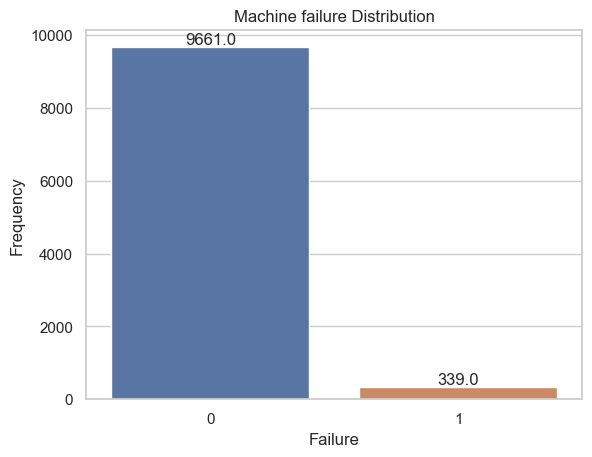

In [496]:
# Criando gráfico de 'Machine failure Distribution'
sns.countplot(x='Machine failure', data = df_MNT_pred)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Machine failure Distribution')

#Adicionando rotulo de dados no gráfico
ax = plt.gca()
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

plt.show()

*OBS:* Podemos verificar um desbalanceamento dos dados em relação a falha.

In [497]:
#Realizando a concatenação em uma unica coluna da descrição das falhas encontradas (Há mais de uma descrição para a mesma falha)
def concat_columns_with_1(row):
    columns_to_check = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    values = [col for col in columns_to_check if row[col] == 1]
    if not values:
        return 'No failure'
    return '_'.join(values)

df_MNT_pred['description'] = df_MNT_pred.apply(concat_columns_with_1, axis=1)

df_MNT_pred = df_MNT_pred.drop(['UDI','Product ID','TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1)
df_MNT_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,description
0,M,298.1,308.6,1551,42.8,0,0,No failure
1,L,298.2,308.7,1408,46.3,3,0,No failure
2,L,298.1,308.5,1498,49.4,5,0,No failure
3,L,298.2,308.6,1433,39.5,7,0,No failure
4,L,298.2,308.7,1408,40.0,9,0,No failure


In [498]:
#Como tem mais de um diagnostico de falha, para a mesma categoria, foi mantido apenas o principal diagnostico, retirando os secundários que estão após o delimitador '_', reduzindo o numero de classes
def remove_after_underscore(value):
    if '_' in value:
        return value.split('_')[0]
    else:
        return value
df_MNT_pred['description'] = df_MNT_pred['description'].apply(remove_after_underscore)

In [499]:
df_MNT_pred['description'].value_counts()

description
No failure    9652
HDF            115
PWF             91
OSF             78
TWF             46
RNF             18
Name: count, dtype: int64

Legenda da descrição da falha


- (TWF) tool wear failure;          - *desgaste da ferramenta*
- (HDF) heat dissipation failure;   *dissipação de calor*
- (PWF) power failure;              *falha de energia*
- (OSF) overstrain failure;         *falha de sobretensão*
- (RNF) random failures ;           *falhas aleatórias*

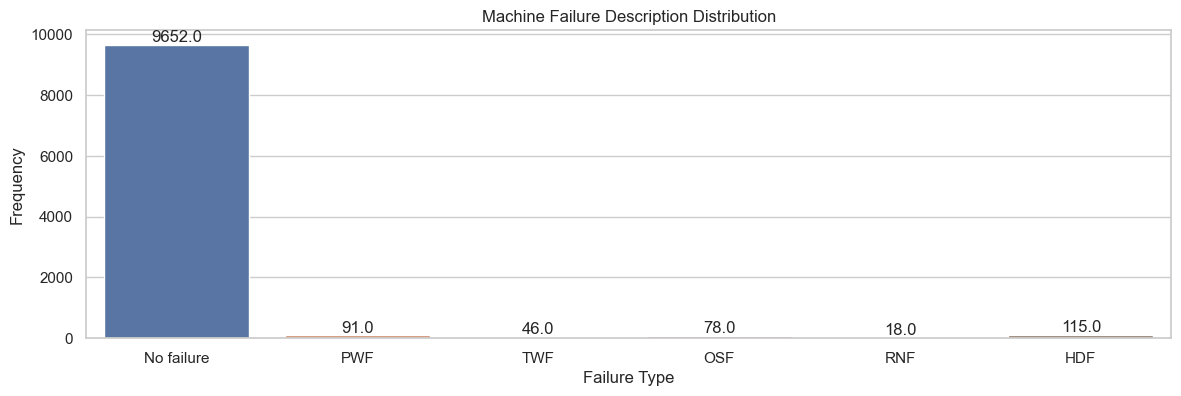

In [500]:
# Criando gráfico de 'Machine failure description Distribution'
plt.figure(figsize=(14,4))
sns.countplot(x='description', data = df_MNT_pred)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Machine Failure Description Distribution')

plt.xticks(rotation=0)

#Adicionando rotulo de dados no gráfico
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

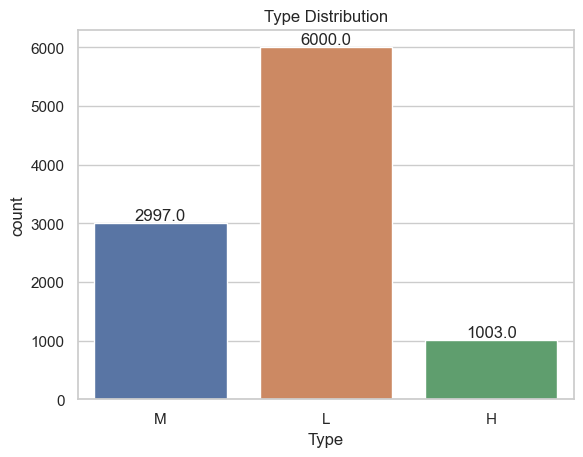

In [501]:
sns.countplot(x="Type", data=df_MNT_pred)
plt.title("Type Distribution")
# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

In [502]:
#Codificando as colunas 'Type' e 'description'
le = LabelEncoder()
df_temp = df_MNT_pred.groupby('description')['description'].count()
df_MNT_pred["Type_encoded"] = le.fit_transform(df_MNT_pred['Type'])
df_MNT_pred['description_encoded'] = le.fit_transform(df_MNT_pred['description'])

print(df_MNT_pred.groupby(['description','description_encoded']).size().reset_index().drop(columns=0))
print('\n\n',df_MNT_pred.groupby(['Type','Type_encoded']).size().reset_index().drop(columns=0))

  description  description_encoded
0         HDF                    0
1  No failure                    1
2         OSF                    2
3         PWF                    3
4         RNF                    4
5         TWF                    5


   Type  Type_encoded
0    H             0
1    L             1
2    M             2


In [503]:
df_MNT_pred = df_MNT_pred.drop(['Type', 'description'], axis=1)

In [504]:
plot1 = ['Machine failure','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]']
plot2 = ['Machine failure','Tool wear [min]', 'Type_encoded', 'description_encoded']


c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


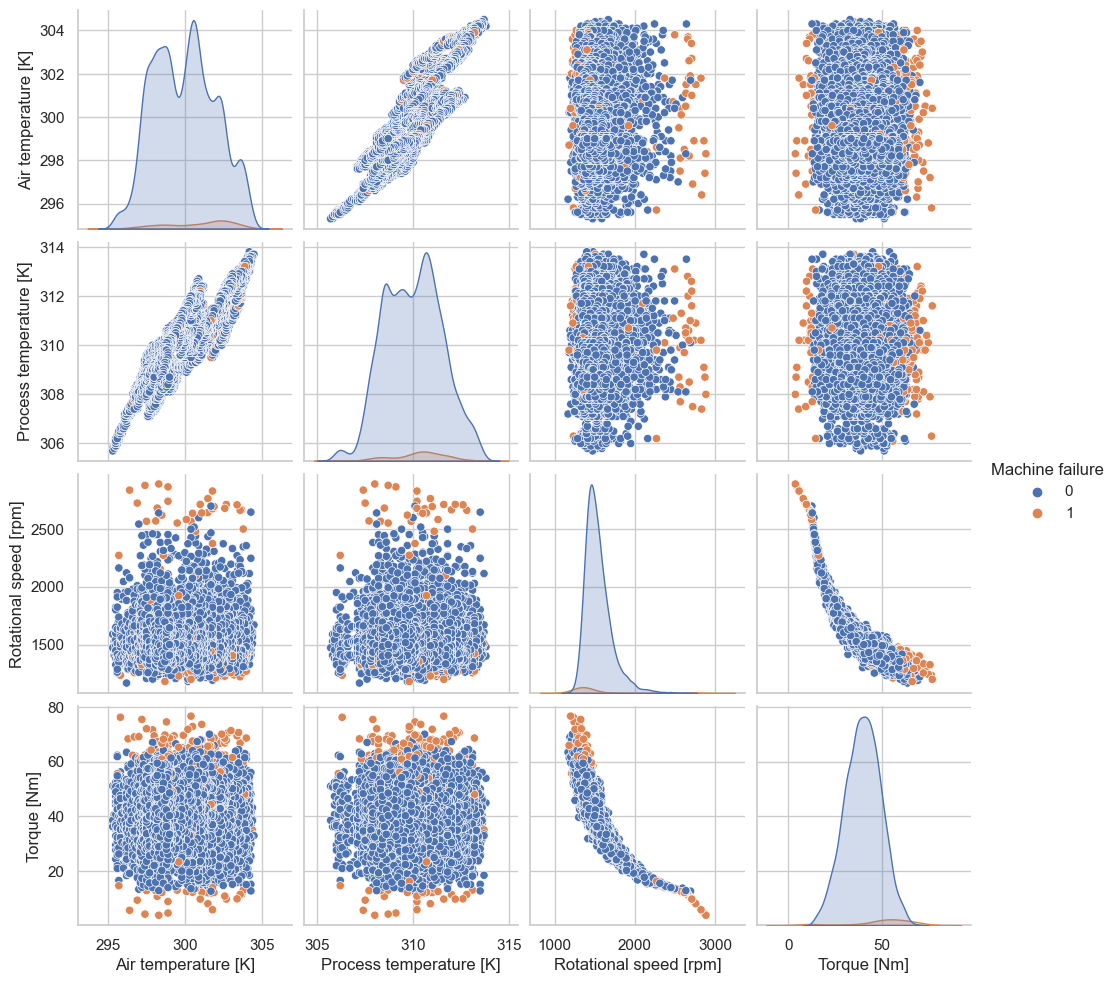

In [505]:
sns.pairplot(df_MNT_pred[plot1],hue= 'Machine failure')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


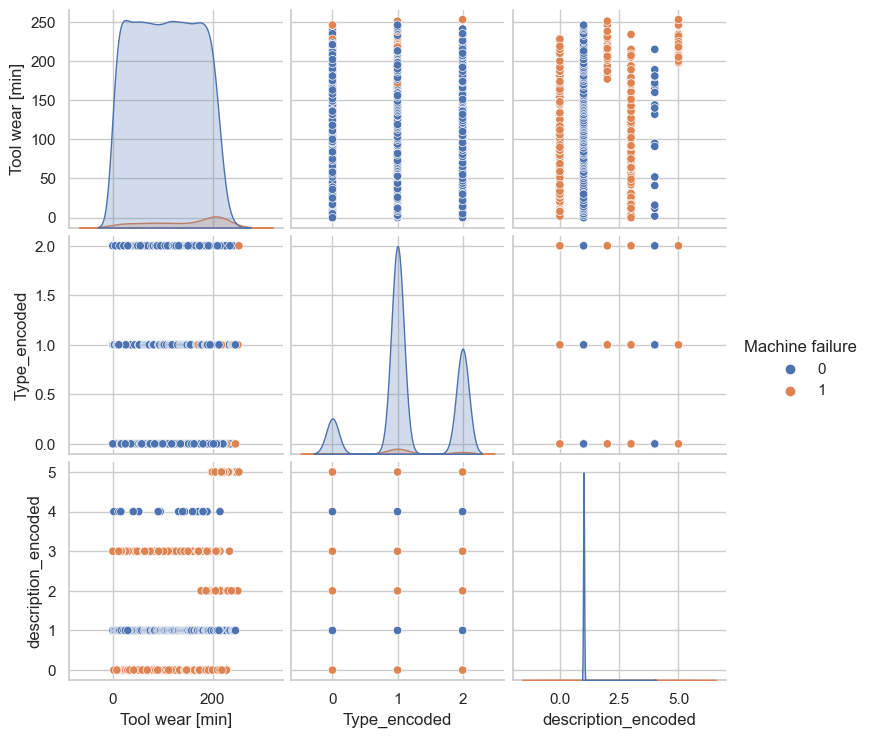

In [506]:
sns.pairplot(df_MNT_pred[plot2],hue= 'Machine failure')

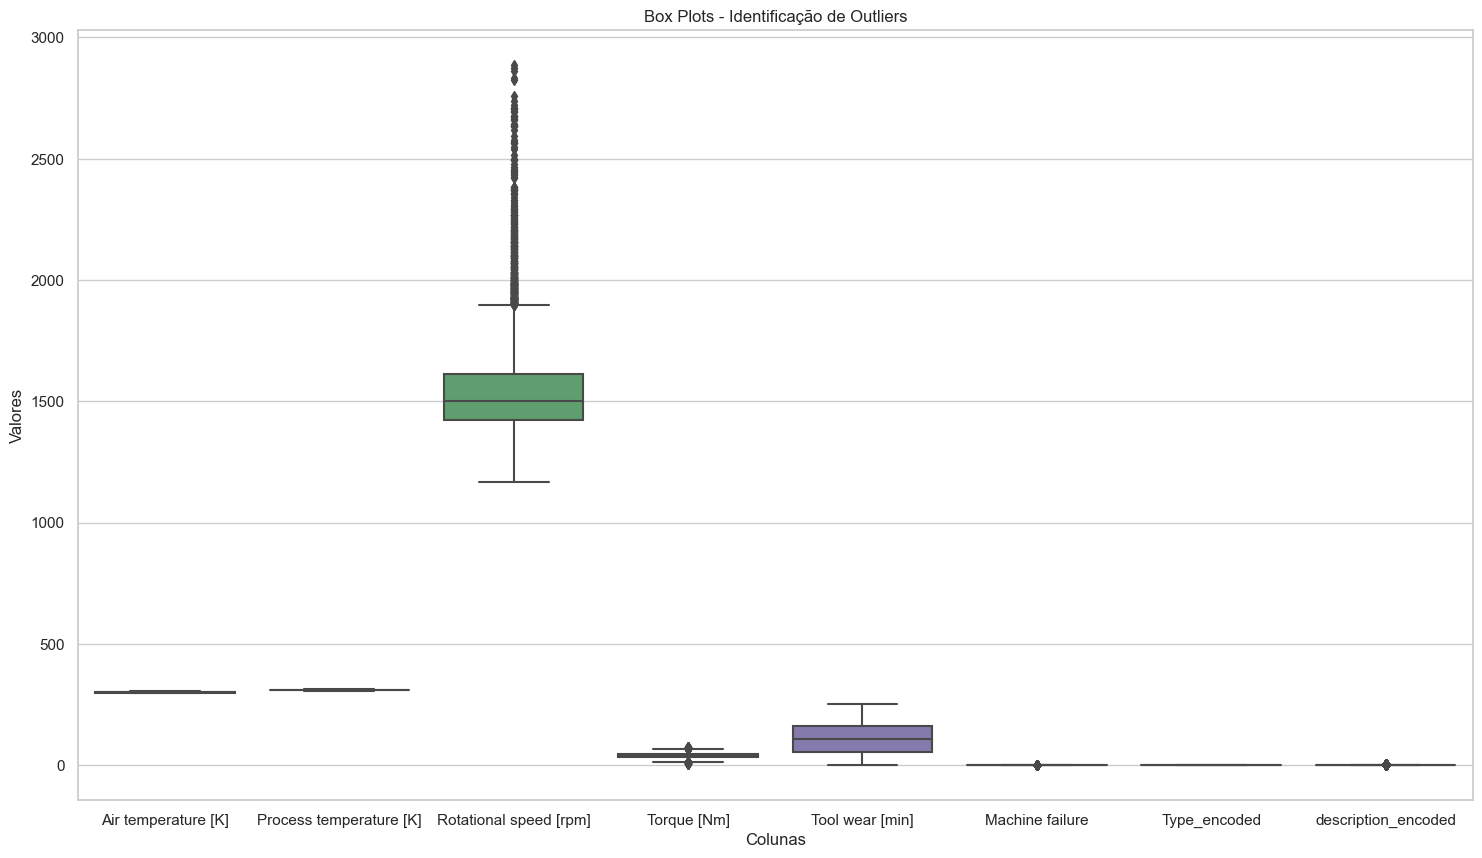

In [507]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_MNT_pred)
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Box Plots - Identificação de Outliers')

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

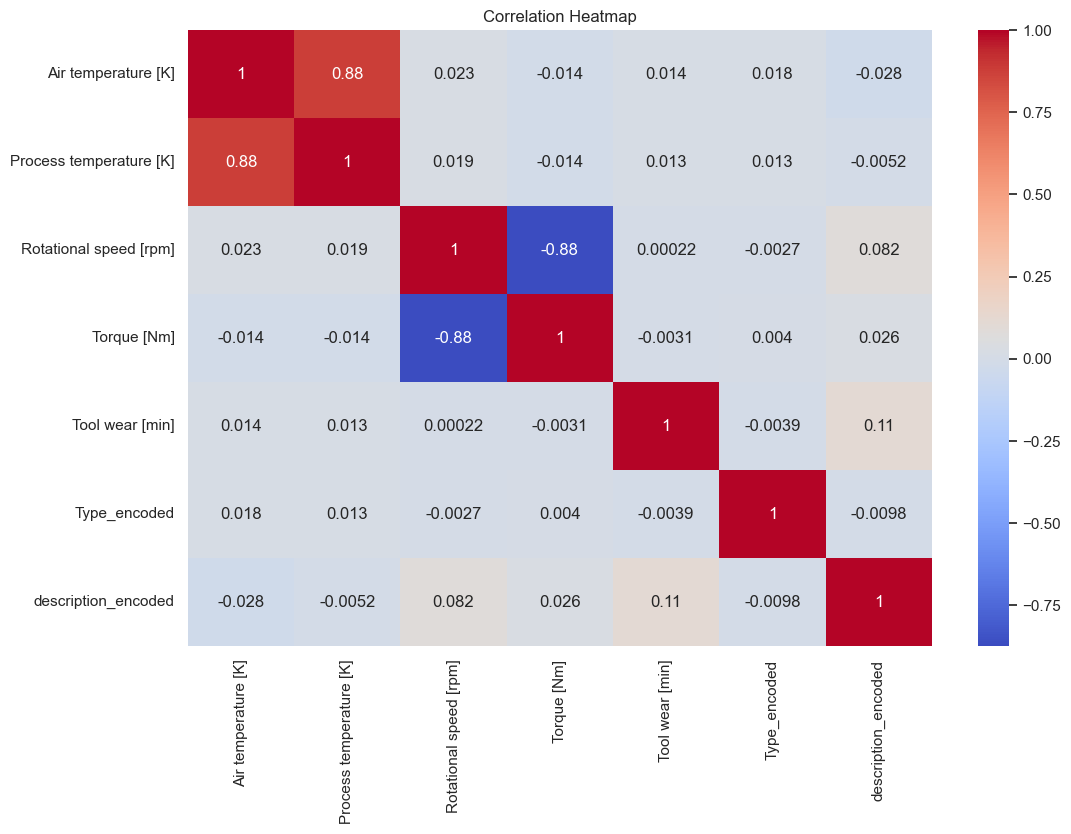

In [508]:
#Mapa de Correlação
df_MNT_pred = df_MNT_pred.drop(['Machine failure'],axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_MNT_pred.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

# 03 - Pipeline e Modelos de Machile Learning

### 3.1 - Algoritimos de Machine Learning Utilizados

##### K-NN - K-Nearest Neighbors

O K-Nearest Neighbors (K-NN) é um algoritmo de aprendizado de máquina supervisionado utilizado tanto para classificação quanto para regressão. Não envolve nenhum modelo matemático complexo, mas se baseia no princípio de similaridade entre os dados. 

O K-NN é um algoritmo de aprendizado baseado em instância, o que significa que ele se baseia na proximidade dos dados de treinamento para fazer previsões sobre novos dados.

A normalização garante que todos dos dados estejam na mesma escala, evitando que dados com valores maiores dominem as distâncias e influenciem de forma desproporcional o algoritmo.

##### Naive Bayes

O Naive Bayes é um algoritmo de aprendizado de máquina supervisionado que se baseia no Teorema de Bayes que descreve como calcular a probabilidade condicional de um evento 'A' ocorrer, dado que um evento 'B' ocorreu. Na classificação, o Teorema de Bayes é usado para calcular a probabilidade de cada classe para um novo dado, dado as features observadas desse dado. É baseado também na suposição "ingênua" (naive) de independência condicional entre as features do conjunto de dados. Isso significa que o valor de uma feature não é influenciado pelo valor de outra feature, uma vez que a classe é conhecida. Essa suposição simplifica os cálculos das probabilidades condicionais durante o treinamento e classificação.

O Naive Bayes não exige explicitamente a normalização dos dados por não ser sensível à escala dos dados, devido à suposição "ingênua" de independência condicional. 

O Naive Bayes é adequado para lidar com dados categóricos ou discretos, como texto, contagens de palavras, atributos binários e outras features discretas. Existem diferentes variantes do Naive Bayes, como o Naive Bayes Gaussiano (usado para features contínuas que seguem uma distribuição normal) e o Naive Bayes Multinomial (usado para features discretas).

Para aplicar o Naive Bayes em dados numéricos, é necessário usar uma variante específica do algoritmo, chamada de Naive Bayes Gaussiano (Gaussian Naive Bayes) que é projetado para lidar com features contínuas, ou seja, dados numéricos que podem assumir um número infinito de valores dentro de um intervalo específico.

##### Árvore de Decisão

A Árvore de Decisão é um algoritmo de aprendizado de máquina supervisionado que é usado para tarefas de classificação e regressão. A árvore de decisão cria uma estrutura de árvore que representa um conjunto de regras de decisão hierárquicas e não lineares, onde cada nó interno representa uma decisão baseada em um atributo (feature) e cada folha representa o resultado (classe ou valor) da decisão.

A árvore de decisão é construída recursivamente dividindo o conjunto de dados em subconjuntos menores com base em atributos que melhor separam as classes. Cada divisão é escolhida com base em critérios de impureza, como o índice Gini (para classificação) ou o erro quadrático médio (para regressão). O processo de divisão continua até que uma condição de parada seja atingida, como profundidade máxima da árvore, número mínimo de amostras por folha ou critérios de impureza atingindo um limite pré-definido.

Quando a Árvore de Decisão é construída, ela escolhe os atributos e os valores de divisão que melhor separam as classes dos dados de treinamento, independentemente da escala dos valores das features. Assim, é desnecessário normalizar ou padronizar os dados antes de aplicar a Árvore de Decisão.

Além disso, a Árvore de Decisão é capaz de lidar com dados categóricos e numéricos diretamente, sem a necessidade de codificação de variáveis categóricas em valores numéricos, tornando-a ainda mais conveniente para trabalhar com diferentes tipos de dados.

#### 3.1.1 Comparação dos modelos

In [516]:
#Dividindo dataframe em: X a matriz de recursos e y é o vetor de rótulos
x = df_MNT_pred.drop(['description_encoded'],axis=1)
y = df_MNT_pred['description_encoded']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_encoded
9069,297.2,308.2,1678,28.1,133,2
2603,299.3,309.2,1334,46.3,31,2
7738,300.5,312.0,1263,60.8,146,2
1579,298.3,308.3,1444,43.8,176,1
5058,303.9,312.9,1526,42.5,194,1
...,...,...,...,...,...,...
5734,302.3,311.8,1369,56.2,208,1
5191,304.0,313.2,1416,46.0,128,1
5390,302.8,312.3,1483,47.2,223,0
860,296.1,306.9,1541,32.6,33,0


In [510]:
""" SMOTETomek é uma combinação dessas duas técnicas. Ele aplica o SMOTE primeiro para gerar amostras sintéticas da 
classe minoritária e, em seguida, utiliza o Tomek Links para remover amostras próximas que podem estar causando 
ambiguidade ou sobreposição entre as classes. Essa abordagem visa melhorar o balanceamento das classes ao mesmo 
tempo que reduz o risco de overfitting. """

# Criando base de treino balanceada - Apenas base de treino
smk = SMOTETomek(random_state=42)
X_train, Y_train = smk.fit_resample(X_train, Y_train)
Y_train

0        1
1        1
2        1
3        1
4        1
        ..
40405    5
40406    5
40407    5
40408    5
40409    5
Name: description_encoded, Length: 40410, dtype: int32

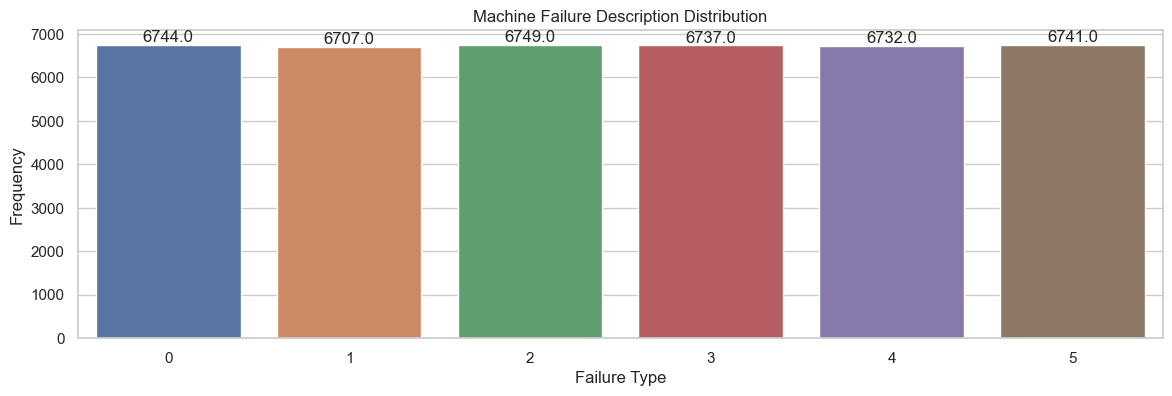

In [511]:
# Criando gráfico de 'Machine failure description Distribution'
Y = Y_train.reset_index()
plt.figure(figsize=(14,4))
sns.countplot(x='description_encoded', data = Y)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Machine Failure Description Distribution')

plt.xticks(rotation=0)

#Adicionando rotulo de dados no gráfico
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [512]:

#Devido a haver outilier em uma das classes, será utilizado ' Min-Max Scaling' (Escalonamento Min-Max)
#Nessa técnica, os valores são dimensionados para um intervalo específico entre 0 e 1, tornando-os comparáveis e evitando que alguma feature domine a análise devido a sua escala original.
scaler = MinMaxScaler()

# Ajustar o scaler nos dados de treino
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transformar os dados de teste usando os mesmos valores de mínimo e máximo dos dados de treino
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Ajustar o scaler nos dados de treino e transformar os dados de treino
#Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))

Y_train_scaled = pd.DataFrame(scaler.fit_transform(Y_train.values.reshape(-1, 1)), index=Y_train.index, columns=['description_encoded'])
# Transformar os dados de teste usando os mesmos valores de mínimo e máximo dos dados de treino
Y_test_scaled = pd.DataFrame(scaler.fit_transform(Y_test.values.reshape(-1, 1)), index=Y_test.index, columns=['description_encoded'])

Y_test_scaled = Y_test_scaled.values.ravel()
Y_train_scaled = Y_train_scaled.values.ravel()
Y_test_scaled,Y_train_scaled

(array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2]),
 array([0.2, 0.2, 0.2, ..., 1. , 1. , 1. ]))

In [513]:
# Treinar o modelo K-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
y_pred_knn = knn_model.predict(X_test)


# Treinar o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
y_pred_nb = nb_model.predict(X_test)

# Treinar o modelo Árvore de Decisão
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)

# Avaliar o desempenho dos modelos
print("K-NN")
print("Accuracy:", accuracy_score(Y_test, y_pred_knn))
print("Precision:", precision_score(Y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_knn, average='weighted'))
print()

print("Naive Bayes")
print("Accuracy:", accuracy_score(Y_test, y_pred_nb))
print("Precision:", precision_score(Y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_nb, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_nb, average='weighted'))
print()

print("Árvore de Decisão")
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))
print("Precision:", precision_score(Y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_dt, average='weighted'))

K-NN
Accuracy: 0.7263333333333334
Precision: 0.9682345381273804
Recall: 0.7263333333333334
F1 Score: 0.8238020287318001

Naive Bayes
Accuracy: 0.5716666666666667
Precision: 0.9667994928978936
Recall: 0.5716666666666667
F1 Score: 0.7049593941265554

Árvore de Decisão
Accuracy: 0.95
Precision: 0.9744499649610934
Recall: 0.95
F1 Score: 0.9612648875508976


In [514]:
def calculate_metrics(model_name, y_test, y_pred):
    return {
        "Modelo": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

models = ["K-NN", "Naive Bayes", "Árvore de Decisão"]
y_preds = [y_pred_knn, y_pred_nb, y_pred_dt]

# Calcular as métricas para cada modelo
metrics_list = [calculate_metrics(model, Y_test, y_pred) for model, y_pred in zip(models, y_preds)]

# Criar DataFrame com os valores
df_metrics = pd.DataFrame(metrics_list).round(3)
print(df_metrics)

              Modelo  Accuracy  Precision  Recall  F1 Score
0               K-NN     0.726      0.968   0.726     0.824
1        Naive Bayes     0.572      0.967   0.572     0.705
2  Árvore de Decisão     0.950      0.974   0.950     0.961


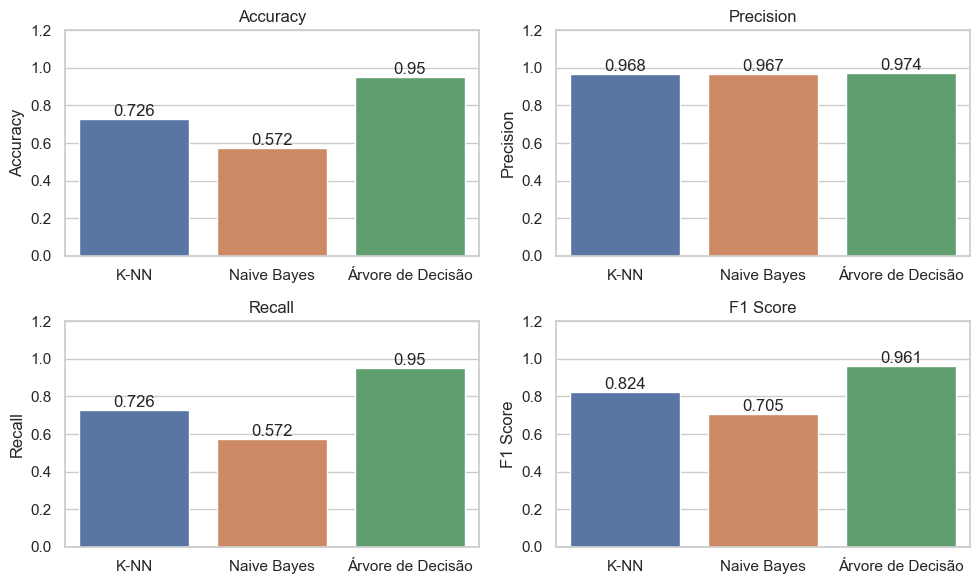

In [515]:
# Plotar gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.subplot(2, 2, metrics.index(metric) + 1)
    sns.barplot(x='Modelo', y=metric, data=df_metrics)
    plt.title(metric)
    plt.ylim(0, 1.2)
    plt.xlabel('')
    plt.ylabel(metric)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 04 - Conclusão

Os modelos de Machine Learning utilizados para realizar treinamento, apresentaram  precisões muito parecidas, porém o modelo de Árvore de Decisão apresentou o melhor desempenho entre os três modelos avaliados, obtendo a maior acurácia, precisão, recall e F1 Score. O modelo K-NN também teve um bom desempenho, enquanto o modelo Naive Bayes teve o desempenho mais baixo das três opções. No entanto, é importante ressaltar que a escolha do melhor modelo depende das características dos dados e dos objetivos do problema específico que está sendo abordado, pois cada modelo de classificação possui suas próprias vantagens, desvantagens, tornando-os mais adequados para certos tipos de dados. É essencial realizar uma análise cuidadosa dos requisitos do problema, das características dos dados e das metas de desempenho. É necessário também experimentar vários modelos e ajustar seus hiperparâmetros para encontrar a melhor combinação para a tarefa específicada.